In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("ObesityDataSetOriginal.csv")

In [3]:
df = df.drop('Weight' , axis=1)
df = df.drop('Height' , axis=1)

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'gamma': [0.001, 0.01],
    'kernel': ['rbf', 'poly']
}
svm = SVC()

In [9]:
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'gamma': 0.01, 'kernel': 'rbf'}


In [10]:
y_pred = best_svm.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.624113475177305
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71        65
           1       0.46      0.35      0.40        52
           2       0.45      0.66      0.53        59
           3       0.57      0.94      0.71        64
           4       0.97      0.99      0.98        75
           5       0.55      0.23      0.32        53
           6       0.57      0.24      0.33        55

    accuracy                           0.62       423
   macro avg       0.61      0.59      0.57       423
weighted avg       0.62      0.62      0.60       423

Confusion Matrix:
 [[48  7  4  2  0  4  0]
 [16 18  5  5  0  2  6]
 [ 1  3 39 12  0  2  2]
 [ 0  1  2 60  0  1  0]
 [ 0  1  0  0 74  0  0]
 [ 5  6 14 13  1 12  2]
 [ 0  3 23 14  1  1 13]]


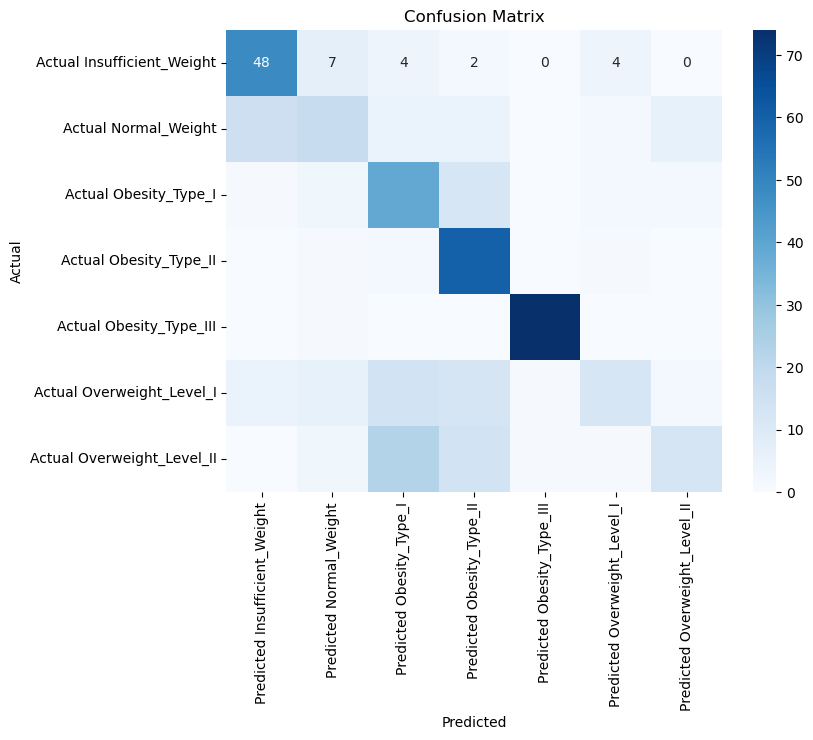

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Insufficient_Weight', 'Predicted Normal_Weight', 'Predicted Obesity_Type_I', 'Predicted Obesity_Type_II', 'Predicted Obesity_Type_III', 'Predicted Overweight_Level_I', 'Predicted Overweight_Level_II'], yticklabels=['Actual Insufficient_Weight', 'Actual Normal_Weight', 'Actual Obesity_Type_I', 'Actual Obesity_Type_II', 'Actual Obesity_Type_III', 'Actual Overweight_Level_I', 'Actual Overweight_Level_II'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()